Question 1.

For multiplying an n*k matrix and a k*m matrix, we need $n$*$k$*$m$ multiplications. The number of columns in the $n$*$k$ matrix is the same as the number of rows in the $k$*$m$ matrix, i.e., $k$. We need to take the dot product (scalar product) of each row in the $n$*$k$ matrix with each column in the $k$*$m$ matrix to get the corresponding element in the product matrix. In each dot product operation, there will be as many multiplications as the number of elements in each of the two vectors being multiplied. In our case, it is equal to k. Therefore, we have k multiplications for each row-column pair. Now, there are $n$ rows in the $n$*$k$ matrix and $m$ columns in the $k$*$m$ matrix. So the total number of pairs is n*m, and we have $k$ multiplications for each pair.
Hence we get the total number of multiplications as $n$*$m$*$k$.

Now, for each scalar product, the number of additions is one less than the number of elements in each of the vectors being dot-multiplied. (total elements = $k$; to add $k$ numbers, we need $k-1$ addition operations).
Hence the total number of addition operations is equal to the number of operations per dot product and the number of dot products, i.e., $n$*$m$*$(k-1)$.

In [2]:
import numpy as np

In [3]:
#question 2
import time

#without using numpy:
t1=time.time()
A=[[1,2,3],[4,5,6]]  #defining matrices as list of lists
B=[[1,2],[3,4],[5,6]]
def multiply(a,b):
  
    if len(a[0])!=len(b):
        print("Invalid matrices; cannot be multiplied")
    else:
        #initialising product matrix as a matrix of zeroes and then updating the entries:
        result=[]
        for p in range(len(a)):
            row=[]
            for q in range(len(b[0])): #len(b[0]) is the number of columns in the matrix
                row.append(0)
            result.append(row)

    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(a[0])):
                result[i][j]=result[i][j] + a[i][k] * b[k][j]
    return result

c=multiply(A, B)
t2=time.time()
print("Product after multiplying using nested lists: ", c)
print("Time taken by nested lists multiplication: ", t2-t1)
#using numpy:
t3=time.time()
C=np.array(A) #converting the same matrices to numpy matrices
D=np.array(B)

product=np.dot(C,D)
t4=time.time()
print("Product after multiplying using numpy: ")
print(product)
print("Time taken by numpy multiplication: ", t4-t3)
print("The time function seems to be glithching sometimes:(")



Product after multiplying using nested lists:  [[22, 28], [49, 64]]
Time taken by nested lists multiplication:  0.0
Product after multiplying using numpy: 
[[22 28]
 [49 64]]
Time taken by numpy multiplication:  0.0
The time function seems to be glithching sometimes:(


Ideally, the algorithm used by numpy should take lesser time, because it is more optimized than any brute force method that we can use to mutiply matrices. It is of time complexity O($n^{3}$)

Question 3: The given algorithm can find the median in O($n^{2}$) time; if we go about eliminating the $n^{th}$ largest number in each entry, then we need to reach the $(n/2)^{th}$ largest entry to find the median. A better algorithm would be to sort the array first in lesser time complexity, and then look at the middle element. We can sort the array in O($n*log(n)$)

In [47]:
#quicksort algorithm:
#i have referred to the website GeeksForGeeks for some help with the quicksort code
array=[23,12,4,32,78,90,43,32,267,3]

t1=time.time()
def partition(array, low, high):
	pivot = array[high]
	i = low - 1

	# traverse through all elements and compare them with the pivot
	for j in range(low, high):
		if array[j] <= pivot:

			# If element smaller than pivot is found, swap it with the greater element pointed by i
			i = i + 1

			# Swapping element at i with element at j
			(array[i], array[j]) = (array[j], array[i])

	# Swap the pivot element with the greater element specified by i
	(array[i + 1], array[high]) = (array[high], array[i + 1])

	# Return the position from where partition is done
	return i + 1
def quickSort(array, low, high):
	if low < high:

		# Find pivot element such that elements smaller than pivot are on the left and elements greater than pivot are on the right
		pi = partition(array, low, high)

		# Recursive call on the left of pivot
		quickSort(array, low, pi - 1)

		# Recursive call on the right of pivot
		quickSort(array, pi + 1, high)


size = len(array)

quickSort(array, 0, size - 1)

print('Sorted Array in Ascending Order:')
print(array)



if len(array)%2==0:
    median=array[len(array)//2]
else:
    median=(array[len(array)//2]+array[(len(array)//2)+1])/2
t2=time.time()
print(median)
t3=time.time()
np_array=np.array(array)
median_np=np.median(np_array)
t4=time.time()
print(median_np)

print("Time taken by sorting algorithm: ", t2-t1)
print("Time taken by sorting algorithm: ", t4-t3)

Sorted Array in Ascending Order:
[3, 4, 12, 23, 32, 32, 43, 78, 90, 267]
32
32.0
Time taken by sorting algorithm:  0.0009999275207519531
Time taken by sorting algorithm:  0.0


In [23]:
%pip install jax

     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.5 kB ? eta -:--:--
     ----------------------- -------------- 41.0/65.5 kB 495.5 kB/s eta 0:00:01
     ----------------------- -------------- 41.0/65.5 kB 495.5 kB/s eta 0:00:01
     ----------------------- -------------- 41.0/65.5 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 65.5/65.5 kB 272.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 2.0 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.7 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.7 MB 1.3 MB/s eta 0:00:02
   -- 

In [24]:
%pip install --upgrade jax jaxlib

   ---------------------------------------- 0.0/46.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.0 MB 2.6 MB/s eta 0:00:18
   ---------------------------------------- 0.3/46.0 MB 4.2 MB/s eta 0:00:11
    --------------------------------------- 0.7/46.0 MB 5.2 MB/s eta 0:00:09
    --------------------------------------- 1.1/46.0 MB 5.9 MB/s eta 0:00:08
   - -------------------------------------- 1.4/46.0 MB 5.9 MB/s eta 0:00:08
   - -------------------------------------- 1.7/46.0 MB 6.1 MB/s eta 0:00:08
   - -------------------------------------- 2.0/46.0 MB 6.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.3/46.0 MB 6.2 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/46.0 MB 6.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.9/46.0 MB 5.9 MB/s eta 0:00:08
   -- ------------------------------------- 3.1/46.0 MB 6.1 MB/s eta 0:00:08
   -- ------------------------------------- 3.4/46.0 MB 5.9 MB/s eta 0:00:08
   ---

In [25]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.


Question 4. Gradient of u(x,y)= $x^{2}$*$y$+ $y^{3}$*$sin(x)$:
With respect to x: $2$*$x$*$y$ + $y^{3}$*$cos(x)$
With respect to y: $x^{2}$ + $3$*$y^{2}$*$sin(x)$

In [4]:
#question 5
import jax
import jax.numpy as jnp


def function(x, y):
    return x*2 * y + y*3 * jnp.sin(x)


gradient_jax = jax.grad(function, argnums=(0, 1))


x1 = 1.2
y1 = 13.0
x2 = 4.5
y2 = 3.2

result_jax1 = gradient_jax(x1, y1)
print("Gradient at (x={}, y={}): {}".format(x1, y1, result_jax1))
result_jax2 = gradient_jax(x2, y2)
print("Gradient at (x={}, y={}): {}".format(x2, y2, result_jax2))

Gradient at (x=1.2, y=13.0): (Array(40.13195, dtype=float32, weak_type=True), Array(5.1961174, dtype=float32, weak_type=True))
Gradient at (x=4.5, y=3.2): (Array(4.37636, dtype=float32, weak_type=True), Array(6.0674095, dtype=float32, weak_type=True))


In [35]:
#question 6
import sympy as sp
x, y = sp.symbols('x y')
f = (x**2) * y + (y**3) * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
print("Partial derivative with respect to x:")
print(df_dx)
print("Partial derivative with respect to y:")
print(df_dy)
#Create "lambdified" functions to convert the expressions to actual functions
df_dx_func = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_func = sp.lambdify((x, y), df_dy, 'numpy')

#Testing the functions with the same values as above:
result_df_dx = df_dx_func(x1, y1)
result_df_dy = df_dy_func(x1, y1)
print(result_df_dx)
print(result_df_dy)

Partial derivative with respect to x:
2*x*y + y**3*cos(x)
Partial derivative with respect to y:
x**2 + 3*y**2*sin(x)
0.7640354132271554
28.551030524293406


In [6]:
#question 7
record = {
    '2022': {
        'Computer Science and Engineering': [
            {'1': {'Roll No': 1,
                   'Name': 'Jiya',
                   'Marks': {
                       'Math': 90,
                       'Science': 85,
                       'English': 78}
                   }
             },
            {'2': {'Roll No': 2,
                   'Name': 'Sujal',
                   'Marks': {
                       'Math': 95,
                       'Science': 75,
                       'English': 68}
                   }
             }
        ],
        'Electrical Engineering': [
            {'12': {'Roll No': 12,
                    'Name': 'Nishi',
                    'Marks': {
                        'Math': 94,
                        'Science': 55,
                        'English': 98}
                    }
              },
            {'21': {'Roll No': 21,
                    'Name': 'Siya',
                    'Marks': {
                        'Math': 89,
                        'Science': 85,
                        'English': 68}
                    }
              }
        ]
    },
    '2021': {
        'Computer Science and Engineering': [
            {'1': {'Roll No': 1,
                   'Name': 'Diya',
                   'Marks': {
                       'Math': 90,
                       'Science': 85,
                       'English': 78}
                   }
             },
            {'2': {'Roll No': 2,
                   'Name': 'Kavya',
                   'Marks': {
                       'Math': 95,
                       'Science': 75,
                       'English': 68}
                   }
             }
        ],
        'Electrical Engineering': [
            {'12': {'Roll No': 12,
                    'Name': 'Siddharth',
                    'Marks': {
                        'Math': 94,
                        'Science': 55,
                        'English': 98}
                    }
              },
            {'21': {'Roll No': 21,
                    'Name': 'Shambhavi',
                    'Marks': {
                        'Math': 89,
                        'Science': 85,
                        'English': 68}
                    }
              }
        ]
    }
}
print(record)

{'2022': {'Computer Science and Engineering': [{'1': {'Roll No': 1, 'Name': 'Jiya', 'Marks': {'Math': 90, 'Science': 85, 'English': 78}}}, {'2': {'Roll No': 2, 'Name': 'Sujal', 'Marks': {'Math': 95, 'Science': 75, 'English': 68}}}], 'Electrical Engineering': [{'12': {'Roll No': 12, 'Name': 'Nishi', 'Marks': {'Math': 94, 'Science': 55, 'English': 98}}}, {'21': {'Roll No': 21, 'Name': 'Siya', 'Marks': {'Math': 89, 'Science': 85, 'English': 68}}}]}, '2021': {'Computer Science and Engineering': [{'1': {'Roll No': 1, 'Name': 'Diya', 'Marks': {'Math': 90, 'Science': 85, 'English': 78}}}, {'2': {'Roll No': 2, 'Name': 'Kavya', 'Marks': {'Math': 95, 'Science': 75, 'English': 68}}}], 'Electrical Engineering': [{'12': {'Roll No': 12, 'Name': 'Siddharth', 'Marks': {'Math': 94, 'Science': 55, 'English': 98}}}, {'21': {'Roll No': 21, 'Name': 'Shambhavi', 'Marks': {'Math': 89, 'Science': 85, 'English': 68}}}]}}


In [7]:
#question 8
class Year:
  def __init__(self, branch):
    self.branch=branch
    self.branches={}
  def add_branch(self, branch):
     self.branches[branch.name]=branch

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add(self, student):
        self.students.append(student)

class Student:
  def __init__(self, roll, name, marks):
    self.roll=roll
    self.name=name
    self.marks=marks

student1=Student(1,'Jiya', {'Maths':90, 'Science':100})
student2=Student(1,'Nishi', {'Maths':99, 'Science':80})
student3=Student(3,'Vedant', {'Maths':85, 'Science':100})

computerscience=Branch('Computer Science and Engineering')
computerscience.add(student1)
computerscience.add(student2)

civil=Branch('Civil Engineering')
civil.add(student3)

year_2022=Year(2022)
year_2022.add_branch(computerscience)
year_2022.add_branch(civil)

print('The name of the first student in Civil engineering in the year 2022 is: ', year_2022.branches['Civil Engineering'].students[0].name)

The name of the first student in Civil engineering in the year 2022 is:  Vedant


In [11]:
#question 9

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
x=np.linspace(0.5, 100, num=199)

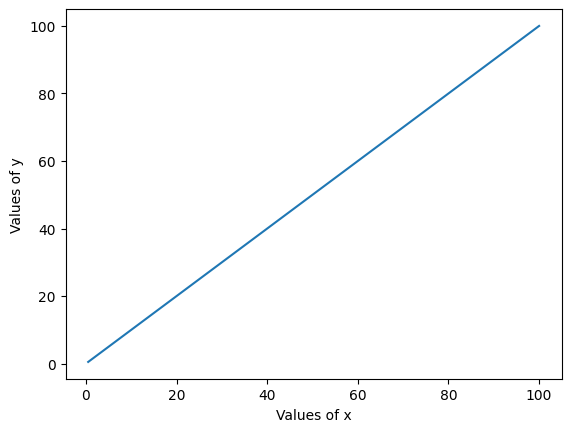

In [12]:
fx1=x
plt.plot(x,fx1, label='y=x')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

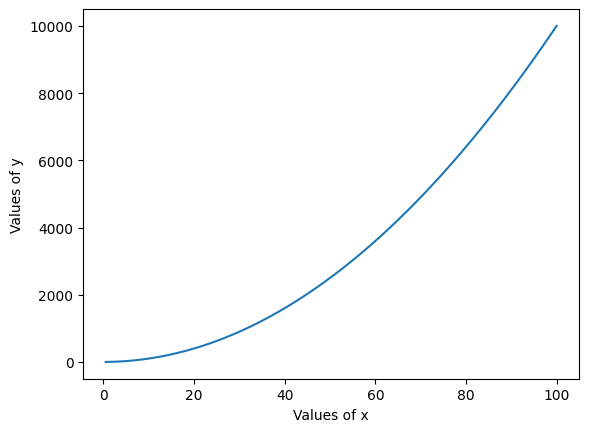

In [13]:
fx2=x**2
plt.plot(x,fx2, label='y=x^2')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

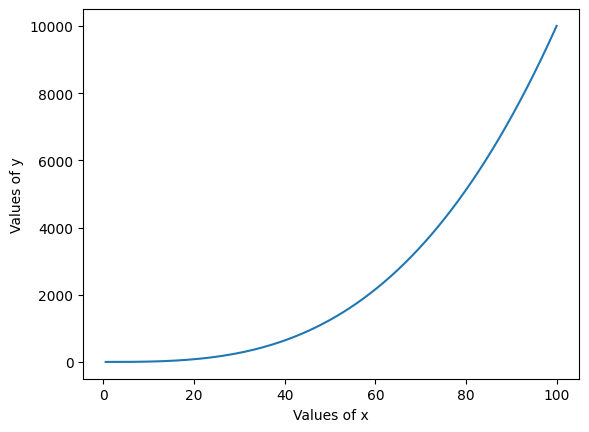

In [14]:
fx3=(x**3)/100
plt.plot(x,fx3, label='y=(x^3)/100')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

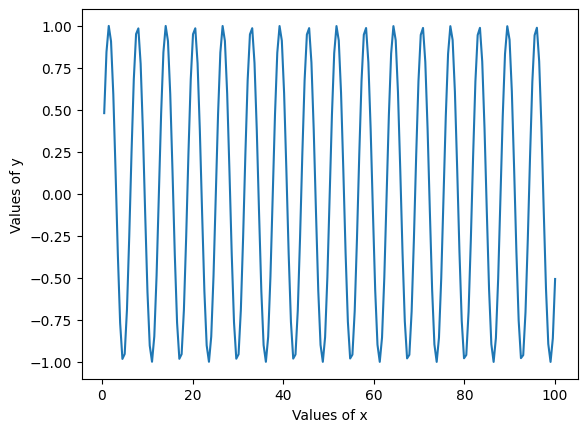

In [15]:
fx4=np.sin(x)
plt.plot(x,fx4, label='y=sin(x)')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

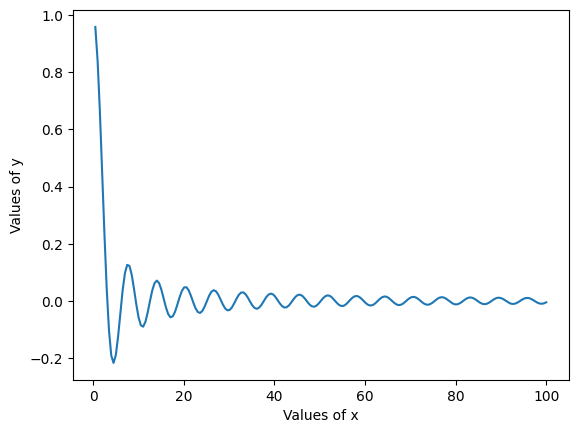

In [16]:
fx5=(np.sin(x))/x
plt.plot(x,fx5, label='y=sin(x)/x')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

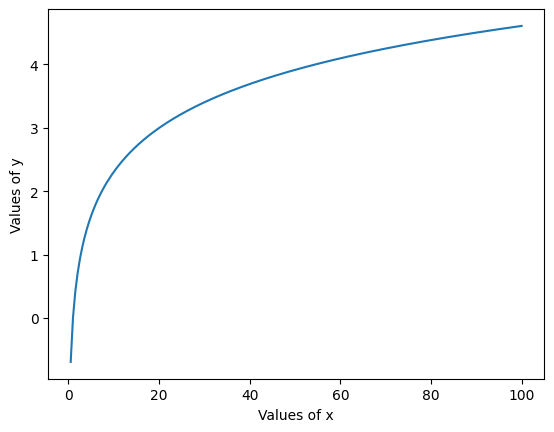

In [17]:
fx6=np.log(x)
plt.plot(x,fx6, label='y=log(x)')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

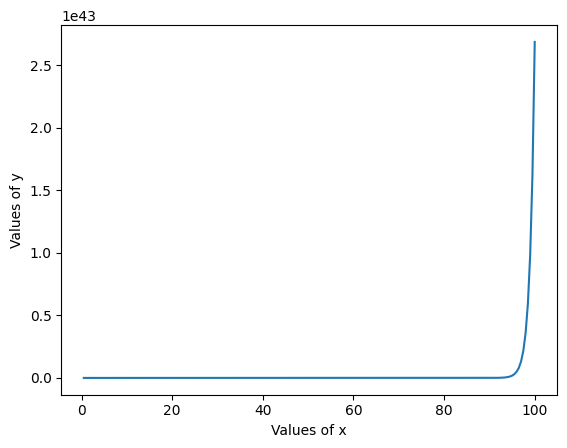

In [18]:
fx7=np.exp(x)
plt.plot(x,fx7, label='y=e^x')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()

In [19]:
#question 10

a=np.random.rand(20,5)
a_scaled=a+1
np.around(a_scaled, 2)
#print(a_scaled)

#creating a list of column names 
column_names = ['a','b','c','d','e'] 
  
#creating the dataframe 
dataframe=pd.DataFrame(data=a_scaled, columns=column_names)
print(dataframe)

#finding standard deviation of all columns:
std_cols=[]
for i in ['a', 'b', 'c', 'd', 'e']:
  std_cols.append(dataframe[i].std())

#finding the index of the column with the minimum standard deviation
max_std_idx=std_cols.index(max(std_cols))

if max_std_idx==1:
  col='a'
elif max_std_idx==2:
  col='b'
elif max_std_idx==3:
  col='c'
elif max_std_idx==4:
  col='d'
else:
  col='e'
print("The dataframe column with the maximum standard deviation is ", col)

#finding row with minimum mean:
row_avg = dataframe.mean(axis=1) #axis 1 specifies that the mean operation is to be done over rows

           a         b         c         d         e
0   1.640857  1.994746  1.075690  1.642560  1.818995
1   1.109031  1.659266  1.774713  1.357972  1.705869
2   1.282136  1.504772  1.432069  1.388401  1.021452
3   1.392135  1.426409  1.956441  1.000441  1.065990
4   1.998248  1.348910  1.810830  1.361903  1.411986
5   1.352427  1.422690  1.608751  1.123042  1.697460
6   1.160447  1.246187  1.871600  1.673859  1.943829
7   1.586961  1.225726  1.806464  1.114999  1.773388
8   1.276942  1.759165  1.299427  1.388816  1.087926
9   1.420329  1.724670  1.857182  1.561462  1.890182
10  1.019210  1.557716  1.159906  1.792859  1.683285
11  1.399784  1.607421  1.709411  1.456077  1.628622
12  1.667177  1.167120  1.212907  1.863267  1.949770
13  1.563372  1.934769  1.310852  1.613692  1.046882
14  1.278203  1.955735  1.915735  1.274536  1.366816
15  1.692761  1.383234  1.933803  1.010861  1.305295
16  1.085603  1.352330  1.152355  1.265117  1.286351
17  1.959900  1.015366  1.558736  1.252395  1.

In [20]:
#question 11
dataframe['f']=dataframe['a']+dataframe['b']+dataframe['c']+dataframe['d']+dataframe['e']
dataframe['g']=dataframe['f']
dataframe.loc[dataframe['f'] >=8, 'g'] = 'GT8'
dataframe.loc[dataframe['f'] <8, 'g'] = 'LT8'
print(dataframe)
print("Standard deviation of column 'f' for the rows where column 'g' = 'GT8' :", dataframe[dataframe['g']=='GT8']['f'].std())
print("Standard deviation of column 'f' for the rows where column 'g' = 'LT8' :", dataframe[dataframe['g']=='LT8']['f'].std())


           a         b         c         d         e         f    g
0   1.640857  1.994746  1.075690  1.642560  1.818995  8.172848  GT8
1   1.109031  1.659266  1.774713  1.357972  1.705869  7.606851  LT8
2   1.282136  1.504772  1.432069  1.388401  1.021452  6.628831  LT8
3   1.392135  1.426409  1.956441  1.000441  1.065990  6.841416  LT8
4   1.998248  1.348910  1.810830  1.361903  1.411986  7.931878  LT8
5   1.352427  1.422690  1.608751  1.123042  1.697460  7.204370  LT8
6   1.160447  1.246187  1.871600  1.673859  1.943829  7.895922  LT8
7   1.586961  1.225726  1.806464  1.114999  1.773388  7.507538  LT8
8   1.276942  1.759165  1.299427  1.388816  1.087926  6.812277  LT8
9   1.420329  1.724670  1.857182  1.561462  1.890182  8.453826  GT8
10  1.019210  1.557716  1.159906  1.792859  1.683285  7.212976  LT8
11  1.399784  1.607421  1.709411  1.456077  1.628622  7.801315  LT8
12  1.667177  1.167120  1.212907  1.863267  1.949770  7.860241  LT8
13  1.563372  1.934769  1.310852  1.613692  1.04

In [21]:
#question 12
#broadcasting: it is the automatic resizing of numpy arrays in order to meet the conditions for a given matrix operation
#irrespective of the dimensional constraints. For example, if we want to add 1 to all the elements of a matrix, then instead
#of having to create a matrix of ones of the same dimension and then adding the two matrices, we can directly use
#numpy broadcasting to achieve the same, as demostrated below:

a=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
b=np.array([[1,1,1,1]])

#to increase each element in a by 1, we simply do:
c=a+b #inspite of the dimensions of matrices not being compatible, numpy broadcasting ensures that the job is done:
print(c)
#the operation of adding [1,1,1,1] to each row is said to be 'broadcasted' over the matrix

[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]]


In [5]:
#question 13

def min_index(array):
  min_val=array[0]
  min_index=0

  for i in range(len(array)):
    if array[i]<min_val:
      min_val=array[i]
      min_index=i
  return min_index

array=np.array([23,5,34,78,51,2])
a=min_index(array)
a_argmin=np.argmin(array)

print(a)
print(a_argmin)
print("As can be seen we get the same values for both.")

5
5
As can be seen we get the same values for both.
